In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

In [2]:
energy_floating = pd.read_csv('data/energy_floating_wind.csv')
energy_warehouse = pd.read_csv('data/energy_warehouse_wind.csv')
energy_dangjin = pd.read_csv('data/energy_dangjin_wind.csv')
energy_ulsan = pd.read_csv('data/energy_ulsan_wind.csv')

In [3]:
model_path = 'model'
filename = []
filename.append(os.path.join(model_path, 'floating_wind_checkpoint.h5'))
filename.append(os.path.join(model_path, 'warehouse_wind_checkpoint.h5'))
filename.append(os.path.join(model_path, 'dangjin_wind_checkpoint.h5'))
filename.append(os.path.join(model_path, 'ulsan_wind_checkpoint.h5'))

In [4]:
def make_dataset(data, label, window_size=24):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [5]:
def root_mean_squared_error (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
df = energy_floating.copy()
df.head(24)

,time,dangjin_floating,capacity,time_generation,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2018-03-02 00:00:00,0.0,1000.0,0.000,-2.000000,55.000000,1.000000,6.120755e+00,-2.725136
1,2018-03-02 01:00:00,0.0,1000.0,0.000,-2.666667,55.000000,1.000000,5.799181e+00,-2.461606
2,2018-03-02 02:00:00,0.0,1000.0,0.000,-3.333333,55.000000,1.000000,5.470385e+00,-2.210179
3,2018-03-02 03:00:00,0.0,1000.0,0.000,-4.000000,55.000000,1.000000,5.134692e+00,-1.971024
4,2018-03-02 04:00:00,0.0,1000.0,0.000,-4.333333,56.666667,1.000000,4.812403e+00,-1.688423
5,2018-03-02 05:00:00,0.0,1000.0,0.000,-4.666667,58.333333,1.000000,4.478340e+00,-1.426350
6,2018-03-02 06:00:00,0.0,1000.0,0.000,-5.000000,60.000000,1.000000,4.133425e+00,-1.185241
7,2018-03-02 07:00:00,0.0,1000.0,0.000,-4.000000,58.333333,1.000000,3.402067e+00,-0.954142
8,2018-03-02 08:00:00,11.0,1000.0,0.011,-3.000000,56.666667,1.000000,2.668184e+00,-0.731601
9,2018-03-02 09:00:00,134.0,1000.0,0.134,-2.000000,55.000000,1.000000,1.931852e+00,-0.517638


In [7]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [8]:
feature_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16796, 24, 5), (4199, 24, 5), (4541, 24, 5), (672, 24, 5))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

epoch = 100

In [11]:
model_0 = Sequential()
model_0.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_0.add(Dense(1, activation='relu'))
model_0.compile(loss='mean_squared_error', optimizer='adam')
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24)                2880      
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[0], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_0 = model_0.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/100
525/525 [==============================] - 4s 7ms/step - loss: 0.0553 - val_loss: 0.0189

Epoch 00001: val_loss improved from inf to 0.01892, saving model to model\floating_wind_checkpoint.h5
Epoch 2/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0156 - val_loss: 0.0126

Epoch 00002: val_loss improved from 0.01892 to 0.01257, saving model to model\floating_wind_checkpoint.h5
Epoch 3/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0126 - val_loss: 0.0116

Epoch 00003: val_loss improved from 0.01257 to 0.01157, saving model to model\floating_wind_checkpoint.h5
Epoch 4/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0117 - val_loss: 0.0122

Epoch 00004: val_loss did not improve from 0.01157
Epoch 5/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0116 - val_loss: 0.0108

Epoch 00005: val_loss improved from 0.01157 to 0.01075, saving model to model\floating_wind_checkpoint.h5
Epoch 6/100
525/525

525/525 [==============================] - 3s 6ms/step - loss: 0.0082 - val_loss: 0.0081

Epoch 00048: val_loss improved from 0.00832 to 0.00811, saving model to model\floating_wind_checkpoint.h5
Epoch 49/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0079 - val_loss: 0.0083

Epoch 00049: val_loss did not improve from 0.00811
Epoch 50/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0081 - val_loss: 0.0087

Epoch 00050: val_loss did not improve from 0.00811
Epoch 51/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0081 - val_loss: 0.0081

Epoch 00051: val_loss did not improve from 0.00811
Epoch 52/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0083 - val_loss: 0.0082

Epoch 00052: val_loss did not improve from 0.00811
Epoch 53/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0083 - val_loss: 0.0082

Epoch 00053: val_loss did not improve from 0.00811
Epoch 54/100
525/525 [============

In [13]:
floating_pred = model_0.predict(pred_feature)

In [14]:
df = energy_warehouse.copy()
df.head(24)

,time,dangjin_warehouse,capacity,time_generation,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2018-03-02 00:00:00,0.0,700.0,0.000000,-2.000000,55.000000,1.000000,6.120755e+00,-2.725136
1,2018-03-02 01:00:00,0.0,700.0,0.000000,-2.666667,55.000000,1.000000,5.799181e+00,-2.461606
2,2018-03-02 02:00:00,0.0,700.0,0.000000,-3.333333,55.000000,1.000000,5.470385e+00,-2.210179
3,2018-03-02 03:00:00,0.0,700.0,0.000000,-4.000000,55.000000,1.000000,5.134692e+00,-1.971024
4,2018-03-02 04:00:00,0.0,700.0,0.000000,-4.333333,56.666667,1.000000,4.812403e+00,-1.688423
5,2018-03-02 05:00:00,0.0,700.0,0.000000,-4.666667,58.333333,1.000000,4.478340e+00,-1.426350
6,2018-03-02 06:00:00,0.0,700.0,0.000000,-5.000000,60.000000,1.000000,4.133425e+00,-1.185241
7,2018-03-02 07:00:00,0.0,700.0,0.000000,-4.000000,58.333333,1.000000,3.402067e+00,-0.954142
8,2018-03-02 08:00:00,9.0,700.0,0.012857,-3.000000,56.666667,1.000000,2.668184e+00,-0.731601
9,2018-03-02 09:00:00,93.0,700.0,0.132857,-2.000000,55.000000,1.000000,1.931852e+00,-0.517638


In [15]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [16]:
feature_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16776, 24, 5), (4195, 24, 5), (4541, 24, 5), (672, 24, 5))

In [18]:
model_1 = Sequential()
model_1.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_1.add(Dense(1, activation='relu'))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[1], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_1 = model_1.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/100
525/525 [==============================] - 4s 6ms/step - loss: 0.0418 - val_loss: 0.0172

Epoch 00001: val_loss improved from inf to 0.01716, saving model to model\warehouse_wind_checkpoint.h5
Epoch 2/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0158 - val_loss: 0.0156

Epoch 00002: val_loss improved from 0.01716 to 0.01561, saving model to model\warehouse_wind_checkpoint.h5
Epoch 3/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0145 - val_loss: 0.0138

Epoch 00003: val_loss improved from 0.01561 to 0.01378, saving model to model\warehouse_wind_checkpoint.h5
Epoch 4/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0135 - val_loss: 0.0134

Epoch 00004: val_loss improved from 0.01378 to 0.01336, saving model to model\warehouse_wind_checkpoint.h5
Epoch 5/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0127 - val_loss: 0.0122

Epoch 00005: val_loss improved from 0.01336 to 0.01220, saving mod

525/525 [==============================] - 3s 5ms/step - loss: 0.0087 - val_loss: 0.0093

Epoch 00048: val_loss improved from 0.00926 to 0.00926, saving model to model\warehouse_wind_checkpoint.h5
Epoch 49/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0093 - val_loss: 0.0091

Epoch 00049: val_loss improved from 0.00926 to 0.00914, saving model to model\warehouse_wind_checkpoint.h5
Epoch 50/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0089 - val_loss: 0.0104

Epoch 00050: val_loss did not improve from 0.00914
Epoch 51/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0092 - val_loss: 0.0097

Epoch 00051: val_loss did not improve from 0.00914
Epoch 52/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0090 - val_loss: 0.0093

Epoch 00052: val_loss did not improve from 0.00914
Epoch 53/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0089 - val_loss: 0.0095

Epoch 00053: val_loss did no

In [20]:
warehouse_pred = model_1.predict(pred_feature)

In [21]:
df = energy_dangjin.copy()
df.head(24)

,time,dangjin,capacity,time_generation,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2018-03-02 00:00:00,0.0,1000.0,0.000,-2.000000,55.000000,1.000000,6.120755e+00,-2.725136
1,2018-03-02 01:00:00,0.0,1000.0,0.000,-2.666667,55.000000,1.000000,5.799181e+00,-2.461606
2,2018-03-02 02:00:00,0.0,1000.0,0.000,-3.333333,55.000000,1.000000,5.470385e+00,-2.210179
3,2018-03-02 03:00:00,0.0,1000.0,0.000,-4.000000,55.000000,1.000000,5.134692e+00,-1.971024
4,2018-03-02 04:00:00,0.0,1000.0,0.000,-4.333333,56.666667,1.000000,4.812403e+00,-1.688423
5,2018-03-02 05:00:00,0.0,1000.0,0.000,-4.666667,58.333333,1.000000,4.478340e+00,-1.426350
6,2018-03-02 06:00:00,0.0,1000.0,0.000,-5.000000,60.000000,1.000000,4.133425e+00,-1.185241
7,2018-03-02 07:00:00,0.0,1000.0,0.000,-4.000000,58.333333,1.000000,3.402067e+00,-0.954142
8,2018-03-02 08:00:00,4.0,1000.0,0.004,-3.000000,56.666667,1.000000,2.668184e+00,-0.731601
9,2018-03-02 09:00:00,154.0,1000.0,0.154,-2.000000,55.000000,1.000000,1.931852e+00,-0.517638


In [22]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [23]:
feature_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 5), (4204, 24, 5), (4541, 24, 5), (672, 24, 5))

In [25]:
model_2 = Sequential()
model_2.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_2.add(Dense(1, activation='relu'))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[2], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_2 = model_2.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/100
526/526 [==============================] - 4s 6ms/step - loss: 0.0390 - val_loss: 0.0173

Epoch 00001: val_loss improved from inf to 0.01732, saving model to model\dangjin_wind_checkpoint.h5
Epoch 2/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0163 - val_loss: 0.0135

Epoch 00002: val_loss improved from 0.01732 to 0.01351, saving model to model\dangjin_wind_checkpoint.h5
Epoch 3/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0145 - val_loss: 0.0124

Epoch 00003: val_loss improved from 0.01351 to 0.01237, saving model to model\dangjin_wind_checkpoint.h5
Epoch 4/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0135 - val_loss: 0.0118

Epoch 00004: val_loss improved from 0.01237 to 0.01184, saving model to model\dangjin_wind_checkpoint.h5
Epoch 5/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0129 - val_loss: 0.0116

Epoch 00005: val_loss improved from 0.01184 to 0.01158, saving model to mo

526/526 [==============================] - 3s 5ms/step - loss: 0.0091 - val_loss: 0.0087

Epoch 00048: val_loss did not improve from 0.00833
Epoch 49/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0091 - val_loss: 0.0084

Epoch 00049: val_loss did not improve from 0.00833
Epoch 50/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0089 - val_loss: 0.0095

Epoch 00050: val_loss did not improve from 0.00833
Epoch 51/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0090 - val_loss: 0.0082

Epoch 00051: val_loss improved from 0.00833 to 0.00816, saving model to model\dangjin_wind_checkpoint.h5
Epoch 52/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0092 - val_loss: 0.0089

Epoch 00052: val_loss did not improve from 0.00816
Epoch 53/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0092 - val_loss: 0.0085

Epoch 00053: val_loss did not improve from 0.00816
Epoch 54/100
526/526 [=============

In [27]:
dangjin_pred = model_2.predict(pred_feature)

In [28]:
df = energy_ulsan.copy()
df.head(24)

,time,ulsan,capacity,time_generation,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2018-03-02 00:00:00,0.0,500.0,0.000,0.000000,40.000000,2.000000,1.114717,-1.003696
1,2018-03-02 01:00:00,0.0,500.0,0.000,-0.333333,41.666667,2.000000,1.124770,-1.137934
2,2018-03-02 02:00:00,0.0,500.0,0.000,-0.666667,43.333333,2.000000,1.122746,-1.276496
3,2018-03-02 03:00:00,0.0,500.0,0.000,-1.000000,45.000000,2.000000,1.108191,-1.418419
4,2018-03-02 04:00:00,0.0,500.0,0.000,-1.333333,45.000000,1.666667,0.970799,-1.476028
5,2018-03-02 05:00:00,0.0,500.0,0.000,-1.666667,45.000000,1.333333,0.831503,-1.520871
6,2018-03-02 06:00:00,0.0,500.0,0.000,-2.000000,45.000000,1.000000,0.691452,-1.553027
7,2018-03-02 07:00:00,0.0,500.0,0.000,-1.333333,41.666667,1.000000,0.962196,-1.481651
8,2018-03-02 08:00:00,18.0,500.0,0.036,-0.666667,38.333333,1.000000,1.226739,-1.362432
9,2018-03-02 09:00:00,102.0,500.0,0.204,0.000000,35.000000,1.000000,1.476577,-1.195709


In [29]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [30]:
feature_cols = ['Temperature', 'Humidity', 'Wind_X', 'Wind_Y', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 5), (4204, 24, 5), (4541, 24, 5), (672, 24, 5))

In [32]:
model_3 = Sequential()
model_3.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_3.add(Dense(1, activation='relu'))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[3], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_3 = model_3.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/100
526/526 [==============================] - 4s 6ms/step - loss: 0.0379 - val_loss: 0.0166

Epoch 00001: val_loss improved from inf to 0.01662, saving model to model\ulsan_wind_checkpoint.h5
Epoch 2/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0153 - val_loss: 0.0125

Epoch 00002: val_loss improved from 0.01662 to 0.01247, saving model to model\ulsan_wind_checkpoint.h5
Epoch 3/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0133 - val_loss: 0.0126

Epoch 00003: val_loss did not improve from 0.01247
Epoch 4/100
526/526 [==============================] - 3s 6ms/step - loss: 0.0124 - val_loss: 0.0113

Epoch 00004: val_loss improved from 0.01247 to 0.01129, saving model to model\ulsan_wind_checkpoint.h5
Epoch 5/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0123 - val_loss: 0.0117

Epoch 00005: val_loss did not improve from 0.01129
Epoch 6/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0115 -

526/526 [==============================] - 2s 5ms/step - loss: 0.0085 - val_loss: 0.0079

Epoch 00049: val_loss improved from 0.00798 to 0.00786, saving model to model\ulsan_wind_checkpoint.h5
Epoch 50/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0088 - val_loss: 0.0081

Epoch 00050: val_loss did not improve from 0.00786
Epoch 51/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0084 - val_loss: 0.0081

Epoch 00051: val_loss did not improve from 0.00786
Epoch 52/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0085 - val_loss: 0.0080

Epoch 00052: val_loss did not improve from 0.00786
Epoch 53/100
526/526 [==============================] - 3s 5ms/step - loss: 0.0082 - val_loss: 0.0082

Epoch 00053: val_loss did not improve from 0.00786
Epoch 54/100
526/526 [==============================] - 2s 5ms/step - loss: 0.0087 - val_loss: 0.0085

Epoch 00054: val_loss did not improve from 0.00786
Epoch 55/100
526/526 [===============

In [34]:
ulsan_pred = model_3.predict(pred_feature)

In [35]:
model_3.load_weights(filename[3])
pred = model_3.predict(test_feature)

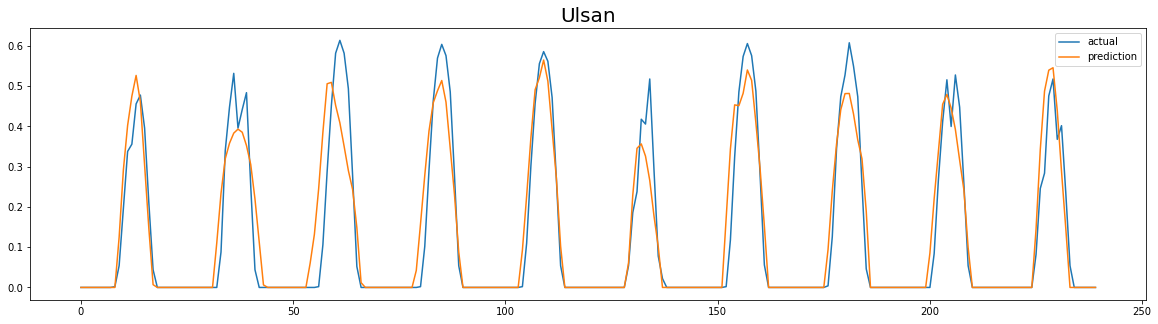

In [36]:
day = 50
day_range = 10

plt.figure(figsize=(20, 5))
plt.title('Ulsan', fontsize=20)
plt.plot(test_label[-day*24:-(day-day_range)*24], label = 'actual')
plt.plot(pred[-day*24:-(day-day_range)*24], label = 'prediction')
plt.legend()
plt.show()

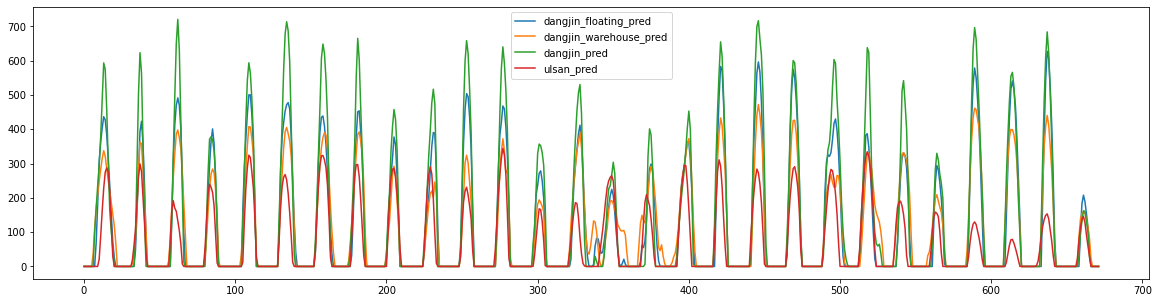

In [37]:
plt.figure(figsize=(20,5))
plt.plot(floating_pred * energy_floating.loc[0, 'capacity'], label = 'dangjin_floating_pred')
plt.plot(warehouse_pred * energy_warehouse.loc[0, 'capacity'], label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred * energy_dangjin.loc[0, 'capacity'], label = 'dangjin_pred')
plt.plot(ulsan_pred * energy_ulsan.loc[0, 'capacity'], label = 'ulsan_pred')
plt.legend()
plt.show()

In [38]:
submission = pd.read_csv('data/sample_submission.csv')

In [39]:
submission.iloc[:24*28, 1] = floating_pred * energy_floating.loc[0, 'capacity']
submission.iloc[:24*28, 2] = warehouse_pred * energy_warehouse.loc[0, 'capacity']
submission.iloc[:24*28, 3] = dangjin_pred * energy_dangjin.loc[0, 'capacity']
submission.iloc[:24*28, 4] = ulsan_pred * energy_ulsan.loc[0, 'capacity']

In [40]:
submission.to_csv('submission.csv', index=False)
submission.head(48)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0.000000,0.000000,0.000000,0.000000
1,2021-02-01 02:00:00,0.000000,0.000000,0.000000,0.000000
2,2021-02-01 03:00:00,0.000000,0.000000,0.000000,0.000000
3,2021-02-01 04:00:00,0.000000,0.000000,0.000000,0.000000
4,2021-02-01 05:00:00,0.000000,0.000000,0.000000,0.000000
5,2021-02-01 06:00:00,0.000000,0.000000,0.000000,0.000000
6,2021-02-01 07:00:00,0.000000,36.823952,0.000000,0.000000
7,2021-02-01 08:00:00,0.000000,109.381508,97.490387,0.000000
8,2021-02-01 09:00:00,67.963448,168.189453,170.981934,0.000000
9,2021-02-01 10:00:00,180.783798,208.835632,232.136658,0.000000
